In [102]:
#initial steps/setup

import pandas as pd
import numpy as np
import requests
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import json

#csv path
cleaned_data_path = "Resources/narrowed.csv"
df_clean=pd.read_csv(cleaned_data_path)

#preview of dataset
print(df_clean.head())

                                     TRACT_NAME    County  \
0   Census Tract 9790, Fremont County, Colorado   FREMONT   
1  Census Tract 9516, Garfield County, Colorado  GARFIELD   
2  Census Tract 28.03, Larimer County, Colorado   LARIMER   
3      Census Tract 9632, Yuma County, Colorado      YUMA   
4  Census Tract 24.01, Larimer County, Colorado   LARIMER   

   Hospitalization_Census_Tract_Rate_per_100,000  \
0                                         716.97   
1                                         602.99   
2                                           0.00   
3                                        1390.98   
4                                         529.77   

   Hospitlization_State_Rate_per_100,000  Adult_Pop_Over_18  \
0                                1267.78               2994   
1                                1267.78               2800   
2                                1267.78                 97   
3                                1267.78               4381   
4    

In [103]:
#count number of rows/entries in cleaned dataframe for summary purposes
len(df_clean)

1228

In [104]:
#random pointless thing just to test code
df_clean.describe()

,"Hospitalization_Census_Tract_Rate_per_100,000","Hospitlization_State_Rate_per_100,000",Adult_Pop_Over_18,Census_Tract_Estimate,Pop_Total,Pop_Density/Sq_Mile,Percent_Poverty,Median_Household_Income,Poverty_Mean_Household_Income,Per_Capita_Income,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,Low_Income_Tract
count,1228.000000,1.228000e+03,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,1438.238143,1.267780e+03,3377.361564,7.018648,4393.978013,3622.958469,12.116531,69648.009772,87190.642508,34938.534202,0.150651,0.321661,0.131107,0.127850,0.785016,0.214984,0.386808
std,962.809027,2.297410e-11,1450.809429,2.896211,1999.258235,3590.898384,9.514684,28880.830704,36730.023608,14353.304577,0.357855,0.467304,0.337655,0.334059,0.410978,0.410978,0.487217
min,0.000000,1.267780e+03,97.000000,0.400000,97.000000,0.300000,0.000000,9578.000000,14461.000000,4854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,805.495000,1.267780e+03,2351.000000,5.200000,3022.000000,461.625000,5.200000,48146.000000,61371.250000,24778.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1208.445000,1.267780e+03,3227.000000,6.600000,4182.500000,3145.800000,9.650000,63714.500000,79026.500000,32510.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1842.957500,1.267780e+03,4212.000000,8.200000,5501.250000,5531.325000,16.600000,86592.000000,105411.500000,41947.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,13651.050000,1.267780e+03,12137.000000,24.500000,15869.000000,37800.000000,80.600000,211500.000000,370179.000000,123933.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
df_clean = df_clean.rename(columns={'COUNTY_NAME':'County', 'DIABETES_ADJRATE':'Hospitalization_Census_Tract_Rate_per_100,000',
                                                    'DIABETES_STATEADJRATE':'Hospitlization_State_Rate_per_100,000',
                                                    'Adult_Population_Age18_and_over':'Adult_Pop_Over_18', 
                                                    'Diabetes_Census_Tract_Estimate':'Census_Tract_Estimate', 
                                                    'Population_Total_y':'Pop_Total', 
                                                    'Population_Density_PerLandSquareMile':'Pop_Density/Sq_Mile',
                                                    'Percent_Poverty_AllPeople_Income_Below_Pov_Level': 'Percent_Poverty', 
                                                    'Poverty_Median_Household_Income': 'Median_Household_Income',
                                                    'Poverty_Per_Capita_Income': 'Per_Capita_Income', 
                                                    'Urban': 'Urban', 'Rural':'Rural', 'LowIncomeTracts': 'Low_Income_Tract'})

print(df_clean.dtypes)
ct_total_count = df_clean['County'].count()
print(ct_total_count)
df_clean.head()

TRACT_NAME                                        object
County                                            object
Hospitalization_Census_Tract_Rate_per_100,000    float64
Hospitlization_State_Rate_per_100,000            float64
Adult_Pop_Over_18                                  int64
Census_Tract_Estimate                            float64
Pop_Total                                          int64
Pop_Density/Sq_Mile                              float64
Percent_Poverty                                  float64
Median_Household_Income                          float64
Poverty_Mean_Household_Income                    float64
Per_Capita_Income                                  int64
LILATracts_1And10                                  int64
LILATracts_halfAnd10                               int64
LILATracts_1And20                                  int64
LILATracts_Vehicle                                 int64
Urban                                              int64
Rural                          

,TRACT_NAME,County,"Hospitalization_Census_Tract_Rate_per_100,000","Hospitlization_State_Rate_per_100,000",Adult_Pop_Over_18,Census_Tract_Estimate,Pop_Total,Pop_Density/Sq_Mile,Percent_Poverty,Median_Household_Income,Poverty_Mean_Household_Income,Per_Capita_Income,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,Low_Income_Tract
0,"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,1267.78,2994,10.0,3471,3.4,9.7,49483.0,61677.0,29749,1,1,0,0,0,1,1
1,"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,1267.78,2800,5.0,3656,6.4,14.5,59154.0,82512.0,32362,0,0,0,0,0,1,0
2,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.00,1267.78,97,1.6,97,0.4,38.1,43882.0,41385.0,27278,0,0,0,0,0,1,0
3,"Census Tract 9632, Yuma County, Colorado",YUMA,1390.98,1267.78,4381,8.0,5467,5.3,13.4,44315.0,53229.0,24196,1,1,0,0,0,1,1
4,"Census Tract 24.01, Larimer County, Colorado",LARIMER,529.77,1267.78,1190,8.0,1310,3.3,10.2,61111.0,83656.0,39123,1,1,1,1,0,1,1


In [146]:
#summary statistics of Percent Poverty per County
mean=df_clean[['County', 'Percent_Poverty']].groupby('County').mean()['Percent_Poverty']
median=df_clean[['County', 'Percent_Poverty']].groupby('County').median()['Percent_Poverty']
std=df_clean[['County', 'Percent_Poverty']].groupby('County').std()['Percent_Poverty']
sem=df_clean[['County', 'Percent_Poverty']].groupby('County').sem()['Percent_Poverty']

statistics_dict_poverty={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
}

summary_statistics=pd.DataFrame(statistics_dict_poverty)
summary_statistics

percent_poverty_summary_df=df_clean.groupby('County').agg({'Percent_Poverty':['mean', 'median', 'std', 'sem']})
percent_poverty_summary_df

Percent_Poverty                            
                      mean median        std       sem
County                                                
ADAMS            12.813542  11.60   9.292528  0.948415
ALAMOSA          23.975000  20.90  12.737706  6.368853
ARAPAHOE          9.935862   7.30   7.601980  0.631310
ARCHULETA        10.925000  11.65   4.422952  2.211476
BACA             18.800000  18.80   9.758074  6.900000
...                    ...    ...        ...       ...
SUMMIT           10.220000  10.40   3.719140  1.663250
TELLER            8.766667   9.05   2.571122  1.049656
WASHINGTON        9.800000   9.80   1.414214  1.000000
WELD             10.886842   7.25  10.545563  1.209659
YUMA             14.350000  14.35   1.343503  0.950000

[64 rows x 4 columns]

In [145]:
#summary stats for Poverty_Mean_Household_Income

mean=df_clean[['County', 'Poverty_Mean_Household_Income']].groupby('County').mean()['Poverty_Mean_Household_Income']
median=df_clean[['County', 'Poverty_Mean_Household_Income']].groupby('County').median()['Poverty_Mean_Household_Income']
std=df_clean[['County', 'Poverty_Mean_Household_Income']].groupby('County').std()['Poverty_Mean_Household_Income']
sem=df_clean[['County', 'Poverty_Mean_Household_Income']].groupby('County').sem()['Poverty_Mean_Household_Income']

statistics_dict_mean_income={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
}

summary_statistics=pd.DataFrame(statistics_dict_mean_income)
summary_statistics

income_summary_df=df_clean.groupby('County').agg({'Poverty_Mean_Household_Income':['mean', 'median', 'std', 'sem']})
income_summary_df

Poverty_Mean_Household_Income                                    
                                    mean   median           std          sem
County                                                                      
ADAMS                       77635.625000  71396.5  25797.354018  2632.931419
ALAMOSA                     52722.000000  55428.0  10269.087658  5134.543829
ARAPAHOE                    97195.834483  84398.0  47791.233745  3968.845939
ARCHULETA                   67872.750000  64313.0  12453.177061  6226.588531
BACA                        51041.000000  51041.0    963.079436   681.000000
...                                  ...      ...           ...          ...
SUMMIT                      93034.600000  99722.0  13067.643678  5844.027914
TELLER                      72798.166667  68859.5  16861.695329  6883.758292
WASHINGTON                  64791.500000  64791.5   8799.943892  6222.500000
WELD                        85840.842105  81531.0  30119.112378  3454.899135
YUMA                        60985.500000  60985.5  10969.347497  7756.500000

[64 rows x 4 columns]

In [163]:
#summary stats for Poverty_Mean_Household_Income

mean=df_clean[['County', 'Median_Household_Income']].groupby('County').mean()['Median_Household_Income']
median=df_clean[['County', 'Median_Household_Income']].groupby('County').median()['Median_Household_Income']
std=df_clean[['County', 'Median_Household_Income']].groupby('County').std()['Median_Household_Income']
sem=df_clean[['County', 'Median_Household_Income']].groupby('County').sem()['Median_Household_Income']

statistics_dict_median_income={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
}

summary_statistics=pd.DataFrame(statistics_dict_median_income)
summary_statistics

# median_income_summary_df=df_clean.groupby('County').agg({'Median_Household_Income':['mean', 'median', 'std', 'sem']})
median_summary_df=df_clean.groupby('County').agg({'Median_Household_Income':['mean', 'median', 'std', 'sem']})
income_summary_df

Poverty_Mean_Household_Income                                    
                                    mean   median           std          sem
County                                                                      
ADAMS                       77635.625000  71396.5  25797.354018  2632.931419
ALAMOSA                     52722.000000  55428.0  10269.087658  5134.543829
ARAPAHOE                    97195.834483  84398.0  47791.233745  3968.845939
ARCHULETA                   67872.750000  64313.0  12453.177061  6226.588531
BACA                        51041.000000  51041.0    963.079436   681.000000
...                                  ...      ...           ...          ...
SUMMIT                      93034.600000  99722.0  13067.643678  5844.027914
TELLER                      72798.166667  68859.5  16861.695329  6883.758292
WASHINGTON                  64791.500000  64791.5   8799.943892  6222.500000
WELD                        85840.842105  81531.0  30119.112378  3454.899135
YUMA                        60985.500000  60985.5  10969.347497  7756.500000

[64 rows x 4 columns]

In [108]:
#Summary stats for Census_Tract_Estimate

mean_hosp=df_clean[['County', 'Census_Tract_Estimate']].groupby('County').mean()['Census_Tract_Estimate']
median_hosp=df_clean[['County', 'Census_Tract_Estimate']].groupby('County').median()['Census_Tract_Estimate']
std_hosp=df_clean[['County', 'Census_Tract_Estimate']].groupby('County').std()['Census_Tract_Estimate']
sem_hosp=df_clean[['County', 'Census_Tract_Estimate']].groupby('County').sem()['Census_Tract_Estimate']

statistics_dict_census_diab={
        'Mean_census_diab' : mean,
        'Median_census_diab' : median,
        'Standard_census_diab': std,
        'Standard_Error_Mean_census_diab' : sem
}

summary_statistics_census_diab=pd.DataFrame(statistics_dict_census_diab)
summary_statistics_census_diab

diab_summary_df=df_clean.groupby('County').agg({'Census_Tract_Estimate':['mean', 'median', 'std', 'sem']})
diab_summary_df.columns

MultiIndex([('Census_Tract_Estimate',   'mean'),
            ('Census_Tract_Estimate', 'median'),
            ('Census_Tract_Estimate',    'std'),
            ('Census_Tract_Estimate',    'sem')],
           )

In [109]:
diab_summary_df['Census_Tract_Estimate']['mean']

County
ADAMS          9.162500
ALAMOSA        5.325000
ARAPAHOE       6.950345
ARCHULETA      3.975000
BACA          15.750000
                ...    
SUMMIT         3.200000
TELLER         6.733333
WASHINGTON     9.550000
WELD           7.132895
YUMA           7.900000
Name: mean, Length: 64, dtype: float64

The correlation between both factors is -0.01


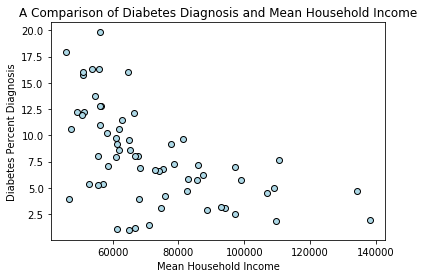

In [118]:
plt.scatter(income_summary_df['Poverty_Mean_Household_Income']['mean'], diab_summary_df['Census_Tract_Estimate']['mean'],
           marker='o', facecolors='lightblue', edgecolors='black')
plt.xlabel('Mean Household Income')
plt.ylabel('Diabetes Percent Diagnosis')
plt.title('A Comparison of Diabetes Diagnosis and Mean Household Income')

income = df_clean.iloc[:,11]
diabetes = df_clean.iloc[:,6]
correlation = st.pearsonr(income,diabetes)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [111]:
#Get the means hospitalizations per 100k per county

mean_hosp=df_clean[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').mean()['Hospitalization_Census_Tract_Rate_per_100,000']
median_hosp=df_clean[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').median()['Hospitalization_Census_Tract_Rate_per_100,000']
std_hosp=df_clean[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').std()['Hospitalization_Census_Tract_Rate_per_100,000']
sem_hosp=df_clean[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').sem()['Hospitalization_Census_Tract_Rate_per_100,000']

statistics_dict_hosp={
        'Mean_hosp' : mean,
        'Median_hosp' : median,
        'Standard_deviation_hosp': std,
        'Standard_Error_Mean_hosp' : sem
}

summary_statistics_hosp=pd.DataFrame(statistics_dict_hosp)
summary_statistics_hosp

df_clean.groupby('County').agg({'Hospitalization_Census_Tract_Rate_per_100,000':['mean', 'median', 'std', 'sem']})
hos_summary_df=df_clean.groupby('County').agg({'Hospitalization_Census_Tract_Rate_per_100,000':['mean', 'median', 'std', 'sem']})

The correlation between both factors is 0.16


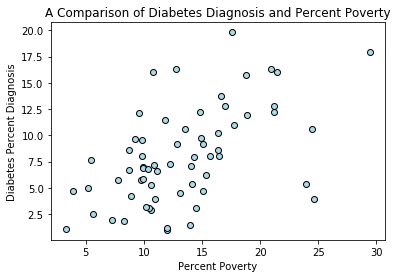

In [116]:
# narrowed_diab_urban['Census_Tract_Estimate']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(percent_poverty_summary_df['Percent_Poverty']['mean'], diab_summary_df['Census_Tract_Estimate']['mean'], 
            marker='o', facecolors='lightblue', edgecolors='black')
plt.xlabel('Percent Poverty')
plt.ylabel('Diabetes Percent Diagnosis')
plt.title('A Comparison of Diabetes Diagnosis and Percent Poverty)

poverty = df_clean.iloc[:,9]
diabetes = df_clean.iloc[:,6]
correlation = st.pearsonr(poverty,diabetes)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.1


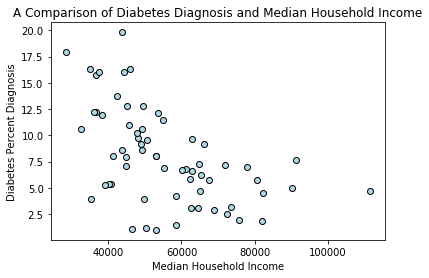

In [141]:
plt.scatter(median_income_summary_df['Median_Household_Income']['mean'], diab_summary_df['Census_Tract_Estimate']['mean'], 
            marker='o', facecolors='lightblue', edgecolors='black')
plt.xlabel('Median Household Income')
plt.ylabel('Diabetes Percent Diagnosis')
plt.title('A Comparison of Diabetes Diagnosis and Median Household Income')

median_income = df_clean.iloc[:,10]
diabetes = df_clean.iloc[:,6]
correlation = st.pearsonr(median_income,diabetes)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.53


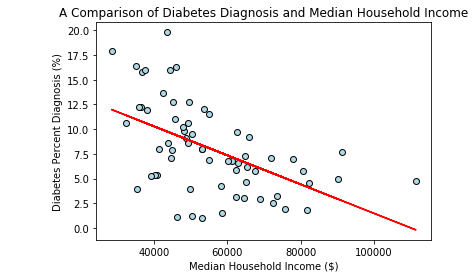

In [165]:
x_values = median_summary_df['Median_Household_Income']['mean']
y_values = diab_summary_df['Census_Tract_Estimate']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Median Household Income ($)')
plt.ylabel('Diabetes Percent Diagnosis (%)')
plt.title('A Comparison of Diabetes Diagnosis and Median Household Income')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.53


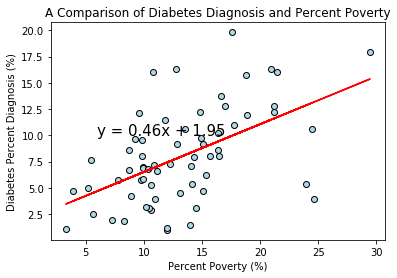

In [161]:
x_values = percent_poverty_summary_df['Percent_Poverty']['mean']
y_values = diab_summary_df['Census_Tract_Estimate']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Percent Poverty (%)')
plt.ylabel('Diabetes Percent Diagnosis (%)')
plt.title('A Comparison of Diabetes Diagnosis and Percent Poverty')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.55


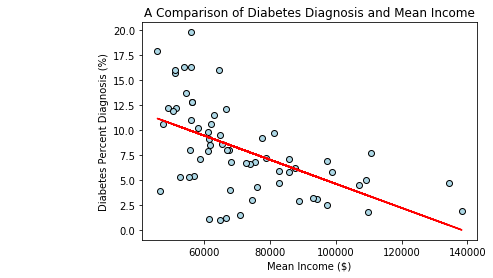

In [160]:
x_values = income_summary_df['Poverty_Mean_Household_Income']['mean']
y_values = diab_summary_df['Census_Tract_Estimate']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', facecolors='lightblue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Mean Income ($)')
plt.ylabel('Diabetes Percent Diagnosis (%)')
plt.title('A Comparison of Diabetes Diagnosis and Mean Income')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()